<a href="https://colab.research.google.com/github/johanaluna/DS7-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS7_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [1]:
!pip install pandas==0.23.4 #intall a old version of pandas to solve some issues with crosstab

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd

data_url= 'https://raw.githubusercontent.com/johanaluna/DS7-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv' #save in a varible the URL of the data
df=pd.read_csv(data_url, usecols=['age','weight','exercise_time']) #Ommit first column because don't provide information
df


In [3]:
 pd.__version__ #check that we have a previous version of Pandas

'0.23.4'

In [4]:
print(df.shape) #check that the data es complete

(1200, 3)


In [5]:
df.isna().sum() #check that there are not NAN values

age              0
weight           0
exercise_time    0
dtype: int64

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [7]:
#ANWERS:
#1. What are the variable types in the data?
print('1. The variable types in the date are:\n',df.dtypes)

1. The variable types in the date are:
 age              int64
weight           int64
exercise_time    int64
dtype: object


In [0]:
#2. What are the relationships between the variables?
# To answer this question we need to compare all the posible relationship bet the variables 
#A. Age vs Weight
#B. Age vs Exercise
#c. Weight vs Exercise

In [0]:
#A. Age vs Weight
#We are going to use Crosstab wich helps us to see the frequency with which certain groups of data appear.
weight_bins= pd.cut(df['weight'],5)# as the data of weight is continuous and extensive, we are going to put the data in groups
crosstab_age_weight=pd.crosstab(df['age'], weight_bins,normalize=True) #normalize=True shows the data in terms of %
crosstab_age_weight

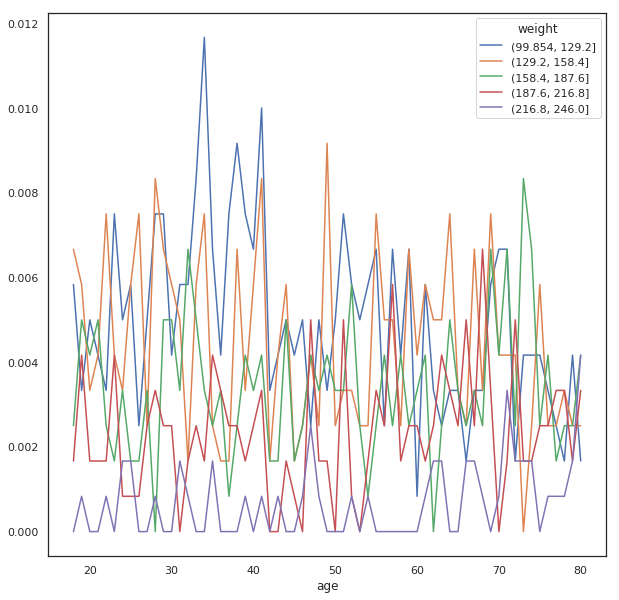

In [119]:
crosstab_age_weight.plot(figsize=(10,10))

In [0]:
# as we can see the grapgh dont show any relationship. For this reason we are going to test the data with the age in groups

In [113]:
#I decided to group the age to see if we can conclude something about the data.
age_bins = pd.cut(df['age'], 6)
crosstab_age_g_weight=pd.crosstab(age_bins, weight_bins,normalize=True) #normalize=True shows the data in terms of %
crosstab_age_g_weight

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 28.333]",0.055000,0.059167,0.030833,0.023333,0.005833
"(28.333, 38.667]",0.070833,0.045000,0.037500,0.023333,0.004167
"(38.667, 49.0]",0.056667,0.049167,0.035833,0.018333,0.006667
"(49.0, 59.333]",0.055833,0.040833,0.031667,0.023333,0.001667
"(59.333, 69.667]",0.033333,0.050833,0.033333,0.034167,0.008333
"(69.667, 80.0]",0.040833,0.034167,0.045833,0.026667,0.017500


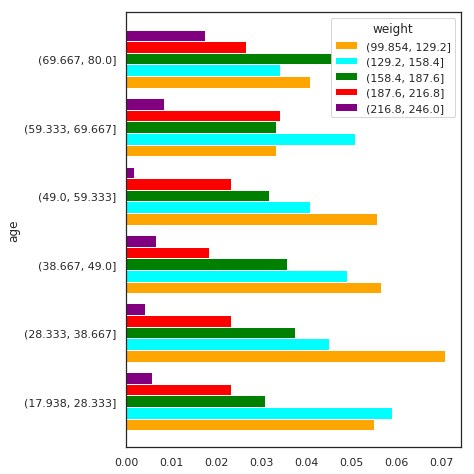

In [151]:
crosstab_age_g_weight.plot(kind='barh', figsize=(6, 8), color=['orange','cyan','green','red', 'purple'], zorder=2, width=0.85);


In [0]:
#As we can see there are not to much realtion between age and weight

In [152]:
#B. Age vs Exercise
time_bins = pd.cut(df['exercise_time'], 8)# as the data of time_exercise is continuous and extensive, we are going to put the data in groups
crosstab_age_exercise=pd.crosstab(df['age'], time_bins,normalize=True) #normalize=True shows the data in terms of %
crosstab_age_exercise


exercise_time,"(-0.3, 37.5]","(37.5, 75.0]","(75.0, 112.5]","(112.5, 150.0]","(150.0, 187.5]","(187.5, 225.0]","(225.0, 262.5]","(262.5, 300.0]"
age,,,,,,,,
18,0.001667,0.000833,0.002500,0.003333,0.002500,0.003333,0.001667,0.000833
19,0.002500,0.003333,0.004167,0.001667,0.002500,0.003333,0.001667,0.000000
20,0.001667,0.001667,0.000833,0.000833,0.002500,0.002500,0.001667,0.002500
21,0.000833,0.000833,0.001667,0.001667,0.003333,0.001667,0.003333,0.001667
22,0.001667,0.002500,0.003333,0.003333,0.001667,0.002500,0.000833,0.000000
23,0.002500,0.001667,0.000833,0.005000,0.002500,0.001667,0.001667,0.001667
24,0.001667,0.001667,0.001667,0.001667,0.003333,0.000833,0.001667,0.001667
25,0.002500,0.000833,0.001667,0.000833,0.001667,0.003333,0.003333,0.001667
26,0.000000,0.001667,0.000833,0.002500,0.000000,0.002500,0.002500,0.002500


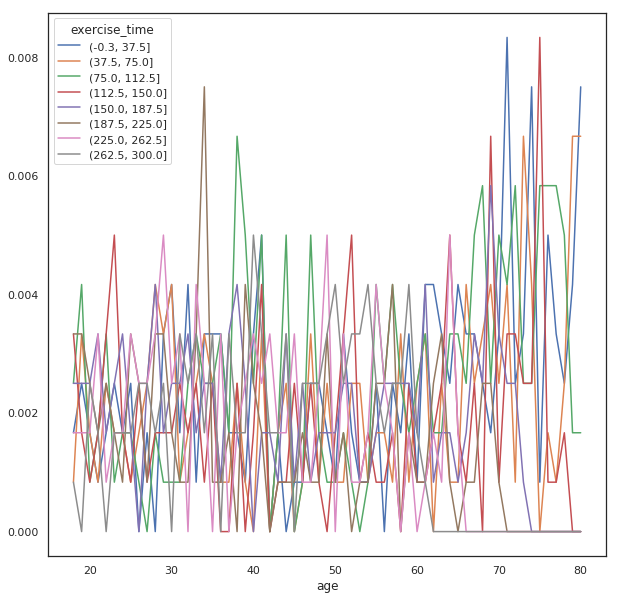

In [155]:
#plot data
crosstab_age_exercise.plot(figsize=(10,10));

In [156]:

crosstab_age_g_exercise = pd.crosstab(age_bins,time_bins,)
crosstab_age_g_exercise

exercise_time,"(-0.3, 37.5]","(37.5, 75.0]","(75.0, 112.5]","(112.5, 150.0]","(150.0, 187.5]","(187.5, 225.0]","(225.0, 262.5]","(262.5, 300.0]"
age,,,,,,,,
"(17.938, 28.333]",20,26,23,28,32,31,29,20
"(28.333, 38.667]",33,27,30,19,30,25,27,26
"(38.667, 49.0]",23,19,33,17,21,21,33,33
"(49.0, 59.333]",21,19,23,22,24,18,20,37
"(59.333, 69.667]",36,29,38,27,29,18,12,3
"(69.667, 80.0]",58,44,55,29,11,1,0,0


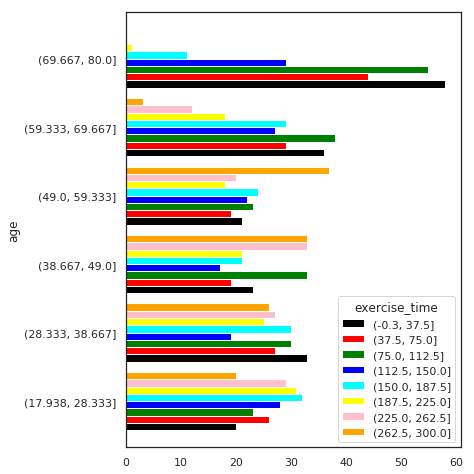

In [134]:
crosstab_age_g_exercise.plot(kind='barh', figsize=(6, 8), color=['black', 'red', 'green', 'blue', 'cyan','yellow','pink','orange'], zorder=2, width=0.85);

In [0]:
#as we can see is not make sense that between a person is older the time in exercise increase for that reason I consider that this is a confounding relationship.

In [0]:
# Again the grapgh dont show any relationship between the variables. For this reason we are going to test the point C
#C. Weight vs Exercise

In [92]:
crosstab = pd.crosstab(time_bins,weight_bins,)
crosstab

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 37.5]",36,31,40,50,34
"(37.5, 75.0]",31,31,43,43,16
"(75.0, 112.5]",41,52,60,46,3
"(112.5, 150.0]",44,29,38,31,0
"(150.0, 187.5]",47,52,39,9,0
"(187.5, 225.0]",51,45,18,0,0
"(225.0, 262.5]",56,46,19,0,0
"(262.5, 300.0]",69,49,1,0,0


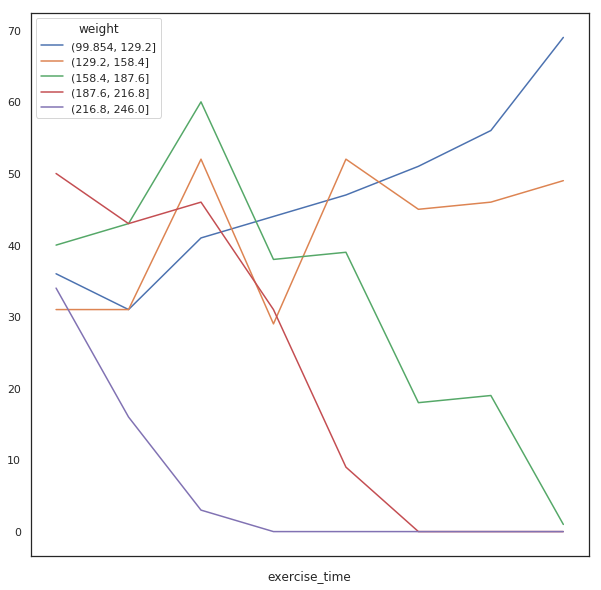

In [157]:
crosstab.plot(figsize=(10,10));

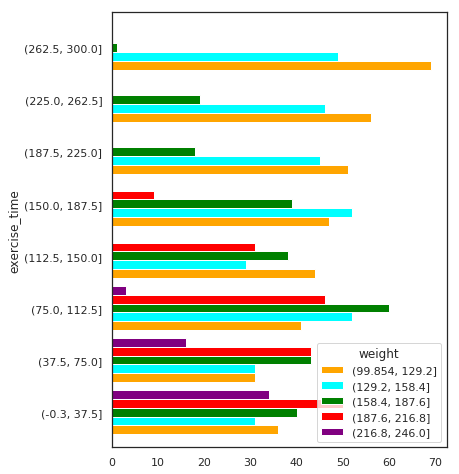

In [160]:
#visualize data in bars
crosstab.plot(kind='barh', figsize=(6, 8), color=['orange','cyan','green','red', 'purple'], zorder=2, width=0.85);

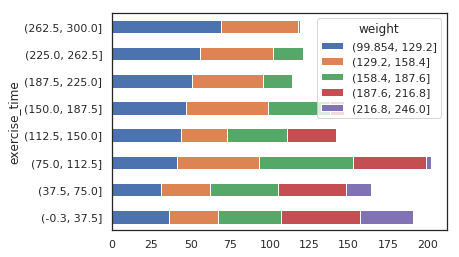

In [161]:
#The same bar but Stacked 
crosstab.plot.barh(stacked=True);

In [0]:
# as we can see there is a relationship between the time doing exercise and the weight

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


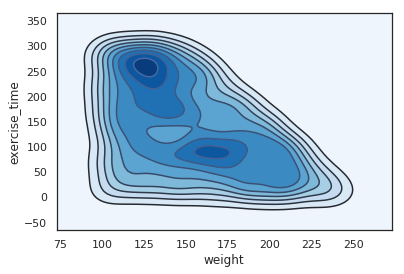

In [164]:
#I like SEABORN. 

sns.set_style("white")
sns.kdeplot(df['weight'],df['exercise_time'])
#sns.plt.show()
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(df['weight'],df['exercise_time'], cmap="Reds", shade=True, bw=.15);
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(df['weight'],df['exercise_time'], cmap="Blues", shade=True, shade_lowest=True, );


In [0]:

#ANSWER: With this graphS we can confirm that people that spend more time doing exercise has less weight.

# The folowing graphs show not just the concentration of the date and also show what is the behavior of the data.

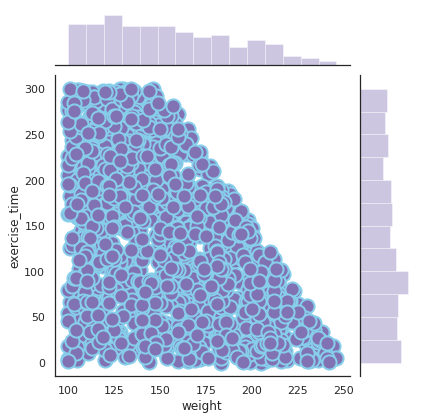

In [169]:
#seaborn with Scatter
sns.jointplot(x=df['weight'], y=df['exercise_time'], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2);


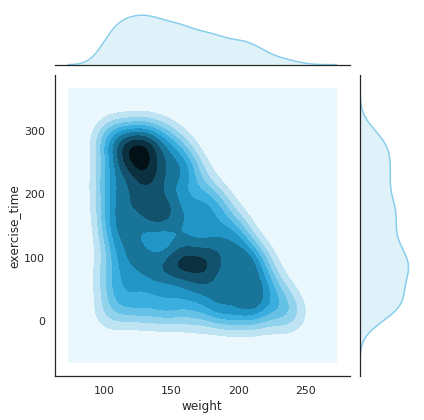

In [170]:
sns.set(style="white", color_codes=True)
sns.jointplot(x=df['weight'], y=df['exercise_time'], kind='kde', color="skyblue")
#seaborn with KDE

In [0]:
#Finally 
# to answer the point 3. We can say that relationships are "real" for time_exercise and Weight
# And  spurious for Age vs Time_exercise and Age_Weight

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)